### Controller Demo

In [1]:
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import sys
import scipy.stats
import pylab as plt
from IPython import display
import pylab as plt

In [4]:
sys.path.append('../codes')

In [5]:
from VMSfunctions.Chemicals import *
from VMSfunctions.Chromatograms import *
from VMSfunctions.MassSpec import *
from VMSfunctions.Controller import *
from VMSfunctions.Common import *
from VMSfunctions.DataGenerator import *

We want a notebook that does the following:
1. create a list of chemical
2. create a new mass spec object, takes chemicals
3. create a new controller, takes mass spec
4. write mzml files

Load densities trained on 4 beer data (see [loader_kde](loader_kde.ipynb)).

In [6]:
ps = load_obj('../models/peak_sampler_4_beers.p')

Load chromatogram data exported from R

In [7]:
xcms_output = '../models/beer_ms1_peaks.csv.gz'
chromatograms = ChromatogramCreator(xcms_output)

0


../codes\VMSfunctions\Common.py:49: RuntimeWarning:

divide by zero encountered in double_scalars



5000
10000
15000
20000
25000
30000
35000
40000
45000


### Generate some chemicals

In [8]:
chemicals = ChemicalCreator(ps, chromatograms)

In [9]:
min_ms1_intensity = 2E5
min_rt = 3*60
max_rt = 21*60
sampled_chemicals = chemicals.sample(min_rt, max_rt, min_ms1_intensity, 100, 2, "Unknown", "Empirical", None, False)

UnknownChemical mz=229.8352 rt=383.04 max_intensity=1.00


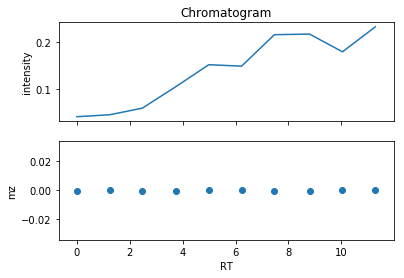

UnknownChemical mz=131.4510 rt=1099.68 max_intensity=1.00


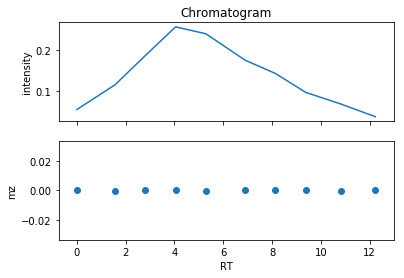

UnknownChemical mz=328.5451 rt=502.94 max_intensity=1.00


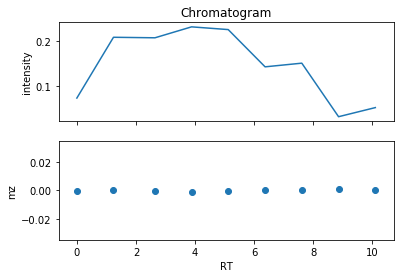

UnknownChemical mz=228.7849 rt=595.49 max_intensity=1.00


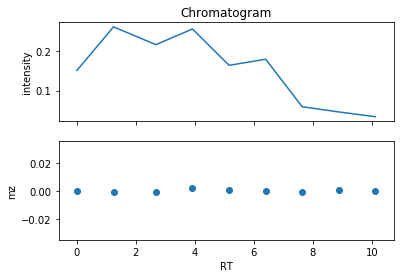

UnknownChemical mz=455.4190 rt=1042.63 max_intensity=1.00


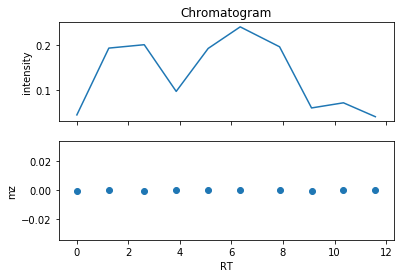

UnknownChemical mz=342.0012 rt=688.13 max_intensity=1.00


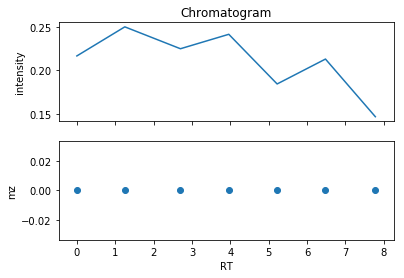

UnknownChemical mz=305.8823 rt=405.68 max_intensity=1.00


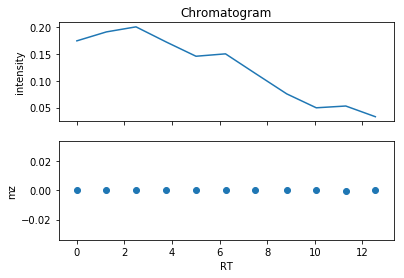

UnknownChemical mz=252.1271 rt=348.38 max_intensity=1.00


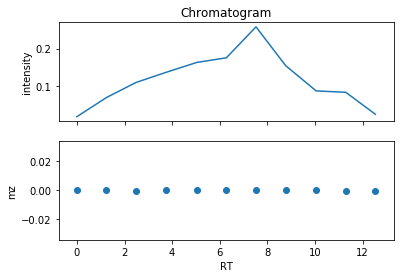

UnknownChemical mz=342.2338 rt=224.77 max_intensity=1.00


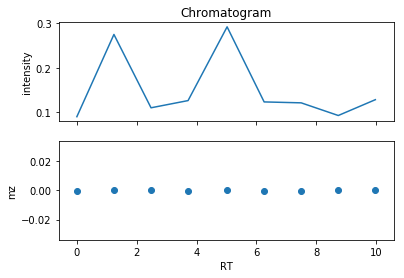

UnknownChemical mz=211.0797 rt=1103.17 max_intensity=1.00


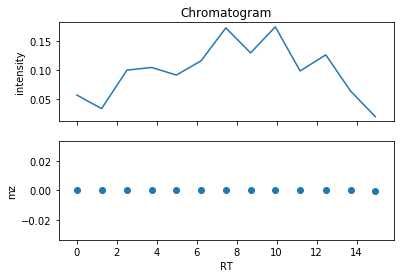

In [10]:
def plot_chromatogram(chrom):
    f, axarr = plt.subplots(2, sharex=True)
    axarr[0].plot(chrom.rts, chrom.intensities)
    axarr[0].set_title('Chromatogram')
    axarr[0].set_ylabel('intensity')
    axarr[1].scatter(chrom.rts, chrom.mzs)
    axarr[1].set_ylabel('mz')
    axarr[1].set_xlabel('RT')    
    plt.show()

for chem in sampled_chemicals[0:10]:
    print(chem)
    plot_chromatogram(chem.chromatogram)

### Set up a simple MS1 controller

Acquisition open


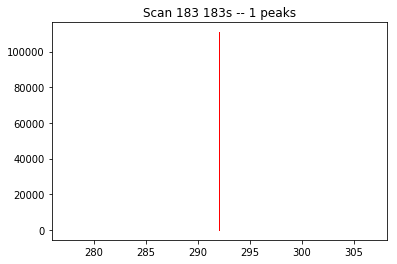

292.0487288197438 110871.30410892403


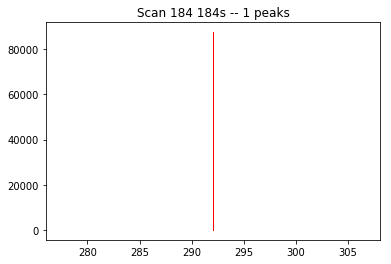

292.0488136772222 87517.23540343183


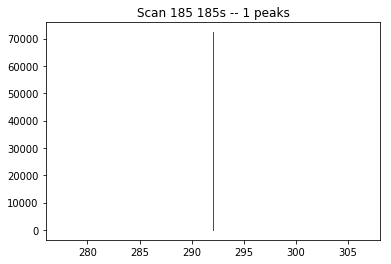

292.0489044671822 72345.0786296728


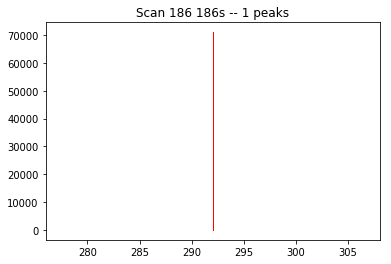

292.0488323216077 71029.85324171676


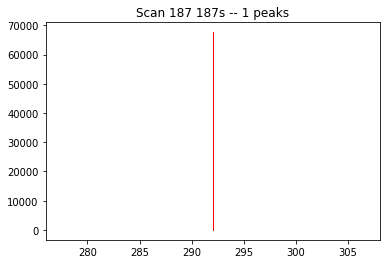

292.048692010109 67637.948852857


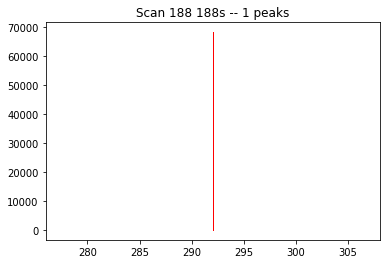

292.0486526093349 68135.60284351734


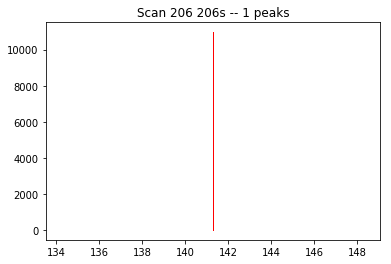

141.2950841936153 10963.839980485853


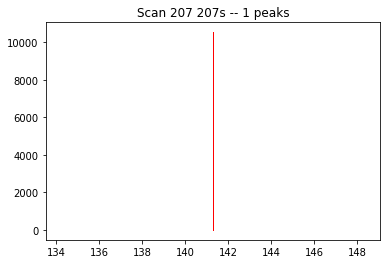

141.29506237267407 10544.741425012016


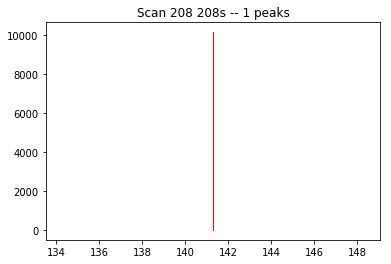

141.29504055173282 10125.64286953818


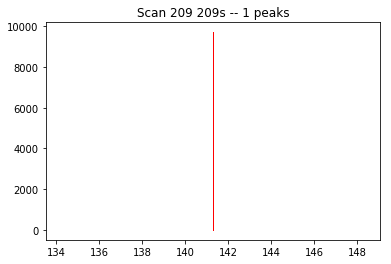

141.29501873079158 9706.544314064344


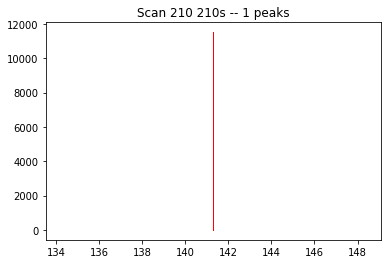

141.2950467973763 11514.87906577317


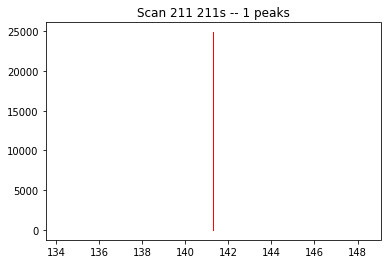

141.2950746395043 24867.08733909828


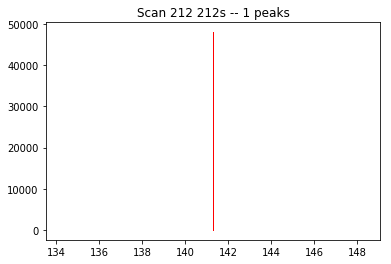

141.2950889089457 48006.42729245296


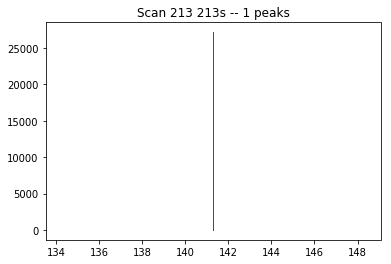

141.2950673681773 27157.28497421143


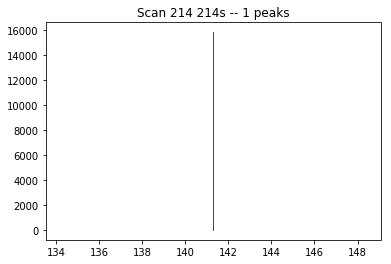

141.29507617945737 15859.761060725794


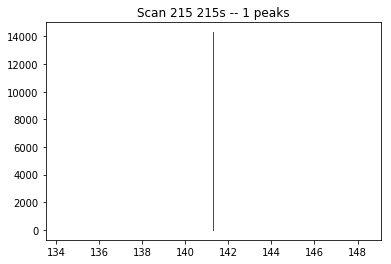

141.29507662138383 14298.750590335141


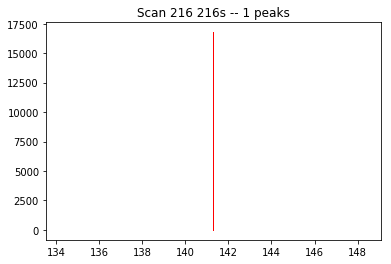

141.2950528021473 16774.79597851282


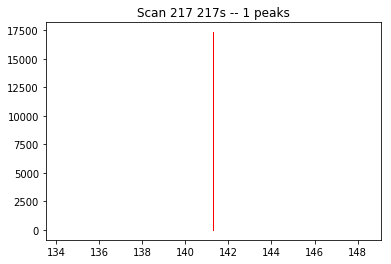

141.29505762782406 17319.156591746527


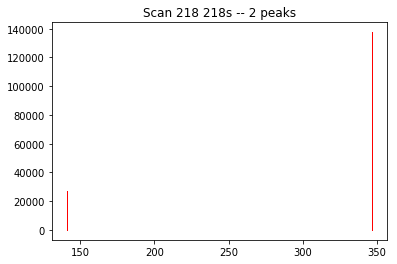

141.29507453450344 27383.89969278076
346.24617548958594 137548.17237712728


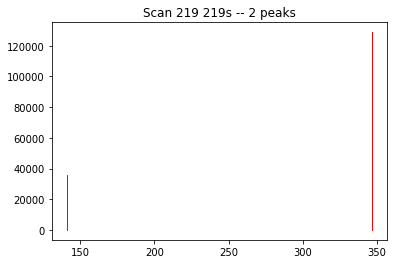

141.29508094518508 35964.94129340956
346.24601792011583 128792.20718823132


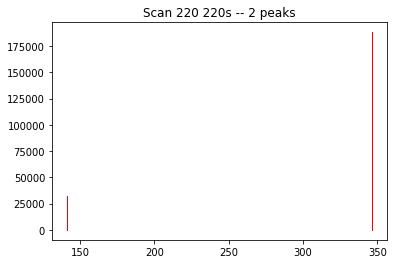

141.29507054680033 32728.90695885444
346.2457556596791 188210.7373413038


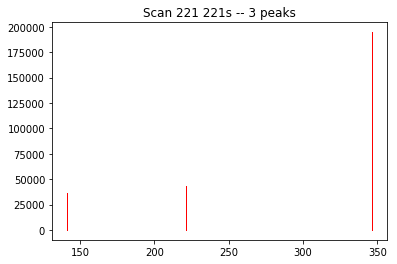

141.29515792712388 36385.504494148176
221.02909585820817 43074.5962374445
346.2461958423188 194685.23268642867


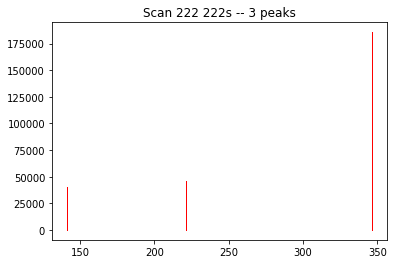

141.295103184979 40533.51808013025
221.02914157738073 46002.254403627645
346.2462234765618 185715.07482911454


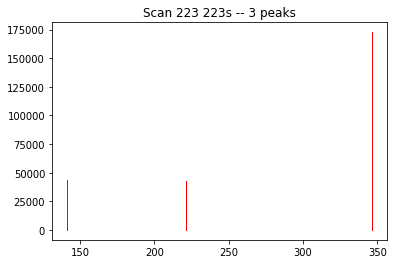

141.29504422420183 43259.562776968996
221.02917114068492 42970.71661850874
346.24592985246704 172741.92803521024


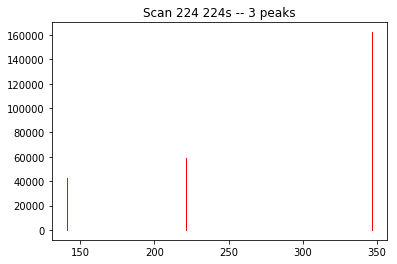

141.2950943533812 42543.96931637944
221.0291219187841 58897.03521891195
346.24654974077333 162261.50022087575
Acquisition closing


In [15]:
max_rt = 225

mass_spec = IndependentMassSpectrometer(sampled_chemicals)
controller = SimpleMs1Controller(chemicals, mass_spec)
controller.run(max_rt)

### Set up a Top-N controller

Acquisition open
Scan 183 -- num_peaks=1 rt=183.00 ms_level=1
Isolated precursor ion 292.0487288197438 window [[(292.0472685760997, 292.0501890633879)]]



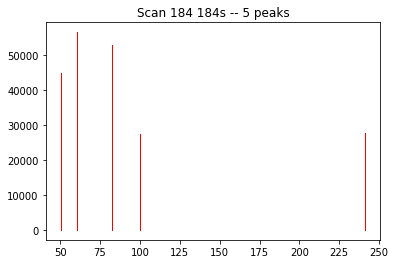

50.37462261873696 44968.51742489535
60.598324006785624 56503.94912342163
82.65685211435786 52750.249642146766
100.34142659972383 27349.495743425396
241.25674602703396 27666.78500822031

Scan 185 -- num_peaks=1 rt=185.00 ms_level=1
Excluded precursor ion 292.0489044671822 185 ExclusionItem(from_mz=292.0472685760997, to_mz=292.0501890633879, from_rt=153, to_rt=213)

Scan 186 -- num_peaks=1 rt=186.00 ms_level=1
Excluded precursor ion 292.0488323216077 186 ExclusionItem(from_mz=292.0472685760997, to_mz=292.0501890633879, from_rt=153, to_rt=213)

Scan 187 -- num_peaks=1 rt=187.00 ms_level=1
Excluded precursor ion 292.048692010109 187 ExclusionItem(from_mz=292.0472685760997, to_mz=292.0501890633879, from_rt=153, to_rt=213)

Scan 188 -- num_peaks=1 rt=188.00 ms_level=1
Excluded precursor ion 292.0486526093349 188 ExclusionItem(from_mz=292.0472685760997, to_mz=292.0501890633879, from_rt=153, to_rt=213)

Scan 206 -- num_peaks=1 rt=206.00 ms_level=1
Isolated precursor ion 141.2950841936153 windo

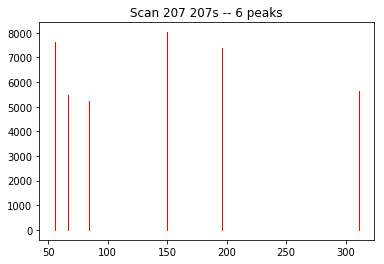

55.39417331173238 7609.440341831882
66.79699888702058 5469.100229641306
84.2980919241066 5249.942850013214
149.87689714511717 8020.058391012076
196.37163390440514 7376.440784869036
311.04127920753547 5638.130186020394

Scan 208 -- num_peaks=1 rt=208.00 ms_level=1
Excluded precursor ion 141.29504055173282 208 ExclusionItem(from_mz=141.29437771819434, to_mz=141.29579066903628, from_rt=176, to_rt=236)

Scan 209 -- num_peaks=1 rt=209.00 ms_level=1
Excluded precursor ion 141.29501873079158 209 ExclusionItem(from_mz=141.29437771819434, to_mz=141.29579066903628, from_rt=176, to_rt=236)

Scan 210 -- num_peaks=1 rt=210.00 ms_level=1
Excluded precursor ion 141.2950467973763 210 ExclusionItem(from_mz=141.29437771819434, to_mz=141.29579066903628, from_rt=176, to_rt=236)

Scan 211 -- num_peaks=1 rt=211.00 ms_level=1
Excluded precursor ion 141.2950746395043 211 ExclusionItem(from_mz=141.29437771819434, to_mz=141.29579066903628, from_rt=176, to_rt=236)

Scan 212 -- num_peaks=1 rt=212.00 ms_level=1
Ex

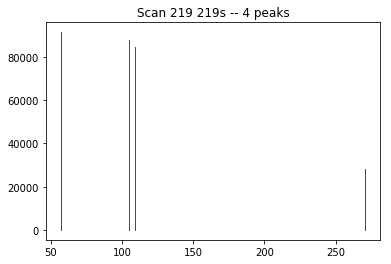

57.128399966618154 91441.64706627424
105.22151136037176 87878.09060649418
109.38081481434577 84542.10936557649
270.6177762921791 28246.101318151927

Scan 220 -- num_peaks=2 rt=220.00 ms_level=1
Excluded precursor ion 346.2457556596791 220 ExclusionItem(from_mz=346.2444442587085, to_mz=346.2479067204634, from_rt=188, to_rt=248)
Excluded precursor ion 141.29507054680033 220 ExclusionItem(from_mz=141.29437771819434, to_mz=141.29579066903628, from_rt=176, to_rt=236)

Scan 221 -- num_peaks=3 rt=221.00 ms_level=1
Excluded precursor ion 346.2461958423188 221 ExclusionItem(from_mz=346.2444442587085, to_mz=346.2479067204634, from_rt=188, to_rt=248)
Isolated precursor ion 221.02909585820817 window [[(221.02799071272887, 221.03020100368747)]]
Excluded precursor ion 141.29515792712388 221 ExclusionItem(from_mz=141.29437771819434, to_mz=141.29579066903628, from_rt=176, to_rt=236)



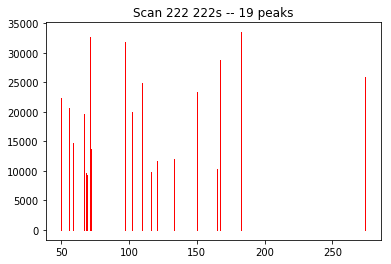

49.902840139003985 22416.914326948485
55.84463171482144 20591.898275668726
59.05440072987582 14721.87887344025
66.72723663373527 19611.002590392298
68.28706729881465 9664.718046485219
68.91618881206335 9258.300035991222
71.18620987140984 32732.997809270357
71.83270153099406 13745.975058491045
97.05087276111499 31864.40146658952
102.56514661218289 19957.9848197489
109.8958113046819 24966.891264447884
116.5175621796136 9867.771383955733
120.36222138788624 11697.948550391737
132.97050538132459 12001.54426732064
150.10336454106877 23293.286264517134
164.72394990956744 10307.509676550417
167.1018002720531 28775.472377972837
182.4238178346639 33485.55425087207
274.2236219870552 25961.953903974743

Scan 223 -- num_peaks=3 rt=223.00 ms_level=1
Excluded precursor ion 346.24592985246704 223 ExclusionItem(from_mz=346.2444442587085, to_mz=346.2479067204634, from_rt=188, to_rt=248)
Excluded precursor ion 141.29504422420183 223 ExclusionItem(from_mz=141.29437771819434, to_mz=141.29579066903628, from

In [24]:
max_rt = 225                    # the maximum retention time of scans to generate
N = 5                           # top-5 DDA fragmentation
mz_tol = 5                      # the mz isolation window around a selected precursor ion
rt_tol = 30                     # the rt window around a selected precursor ion to prevent it from fragmented multiple times
min_ms2_intensity = 5000        # the minimum ms2 peak intensity

mass_spec = IndependentMassSpectrometer(sampled_chemicals)
controller = TopNController(sampled_chemicals, mass_spec, N, mz_tol, rt_tol, min_ms2_intensity=min_ms2_intensity)
controller.run(max_rt)